In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DataSets/InsuranceData.csv')
df.head()

,PolicyNumber,CustomerID,Gender,Age,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,CoverageAmount,ClaimNumber,ClaimDate,ClaimAmount,ClaimStatus
0,P1,C1,Female,73,Auto,13-02-2024,13-02-2025,240.64,33175.10,C1,NaN,0.00,Rejected
1,P2,C2,Male,44,Travel,03-03-2024,03-03-2025,1059.73,85046.42,C2,22-06-2024,1493.06,Pending
2,P3,C3,Female,28,Travel,15-06-2024,15-06-2025,1019.59,68525.53,C3,NaN,0.00,Rejected
3,P4,C4,Male,85,Travel,03-06-2024,03-06-2025,549.70,17053.27,C4,25-02-2025,5021.34,Pending
4,P5,C5,Female,57,Travel,13-06-2024,13-06-2025,841.15,55007.27,C5,30-11-2024,1347.46,Pending


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PolicyNumber     10004 non-null  object 
 1   CustomerID       10004 non-null  object 
 2   Gender           10004 non-null  object 
 3   Age              10004 non-null  int64  
 4   PolicyType       10004 non-null  object 
 5   PolicyStartDate  10004 non-null  object 
 6   PolicyEndDate    10004 non-null  object 
 7   PremiumAmount    10004 non-null  float64
 8   CoverageAmount   10004 non-null  float64
 9   ClaimNumber      10004 non-null  object 
 10  ClaimDate        5649 non-null   object 
 11  ClaimAmount      10004 non-null  float64
 12  ClaimStatus      10004 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1016.2+ KB


In [4]:
df.shape

(10004, 13)

In [5]:
df.dtypes

PolicyNumber        object
CustomerID          object
Gender              object
Age                  int64
PolicyType          object
PolicyStartDate     object
PolicyEndDate       object
PremiumAmount      float64
CoverageAmount     float64
ClaimNumber         object
ClaimDate           object
ClaimAmount        float64
ClaimStatus         object
dtype: object

In [6]:
df.isna().sum()

PolicyNumber          0
CustomerID            0
Gender                0
Age                   0
PolicyType            0
PolicyStartDate       0
PolicyEndDate         0
PremiumAmount         0
CoverageAmount        0
ClaimNumber           0
ClaimDate          4355
ClaimAmount           0
ClaimStatus           0
dtype: int64

# Data Cleaning

In [7]:
df['PolicyStartDate'] = pd.to_datetime(df['PolicyStartDate'], format='%d-%m-%Y')
df['PolicyEndDate'] = pd.to_datetime(df['PolicyEndDate'], format='%d-%m-%Y')
df['ClaimDate'] = pd.to_datetime(df['ClaimDate'], format='%d-%m-%Y')

In [8]:
df['Gender'] = df['Gender'].astype('category')

In [9]:
df.dtypes

PolicyNumber               object
CustomerID                 object
Gender                   category
Age                         int64
PolicyType                 object
PolicyStartDate    datetime64[ns]
PolicyEndDate      datetime64[ns]
PremiumAmount             float64
CoverageAmount            float64
ClaimNumber                object
ClaimDate          datetime64[ns]
ClaimAmount               float64
ClaimStatus                object
dtype: object

In [10]:
dropna = df.copy()

In [11]:
dropna = dropna.dropna()

In [12]:
dropna.shape # dropna is not an optimized solution, fill na with random dates

(5649, 13)

In [13]:
# Fill missing ClaimDate with a random date between PolicyStartDate and PolicyEndDate
df.loc[df['ClaimDate'].isna(), 'ClaimDate'] = df.apply(
    lambda row: row['PolicyStartDate'] + pd.to_timedelta(
        np.random.randint(0, (row['PolicyEndDate'] - row['PolicyStartDate']).days + 1), unit='D'
    ) if pd.isna(row['ClaimDate']) else row['ClaimDate'], axis=1
)

In [14]:
df.head()

,PolicyNumber,CustomerID,Gender,Age,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,CoverageAmount,ClaimNumber,ClaimDate,ClaimAmount,ClaimStatus
0,P1,C1,Female,73,Auto,2024-02-13,2025-02-13,240.64,33175.10,C1,2024-03-16,0.00,Rejected
1,P2,C2,Male,44,Travel,2024-03-03,2025-03-03,1059.73,85046.42,C2,2024-06-22,1493.06,Pending
2,P3,C3,Female,28,Travel,2024-06-15,2025-06-15,1019.59,68525.53,C3,2025-02-18,0.00,Rejected
3,P4,C4,Male,85,Travel,2024-06-03,2025-06-03,549.70,17053.27,C4,2025-02-25,5021.34,Pending
4,P5,C5,Female,57,Travel,2024-06-13,2025-06-13,841.15,55007.27,C5,2024-11-30,1347.46,Pending


In [15]:
df.isna().sum()

PolicyNumber       0
CustomerID         0
Gender             0
Age                0
PolicyType         0
PolicyStartDate    0
PolicyEndDate      0
PremiumAmount      0
CoverageAmount     0
ClaimNumber        0
ClaimDate          0
ClaimAmount        0
ClaimStatus        0
dtype: int64

# Data Manipulation

In [16]:
df['Age'].unique()

array([73, 44, 28, 85, 57, 59, 36, 26, 42, 65, 47, 46, 48, 23, 74, 25, 63,
       61, 33, 84, 53, 27, 45, 64, 60, 75, 37, 78, 62, 66, 71, 51, 24, 18,
       50, 81, 43, 34, 72, 67, 56, 21, 79, 32, 49, 77, 87, 30, 80, 54, 39,
       38, 22, 20, 52, 76, 68, 19, 83, 55, 58, 86, 69, 41, 29, 70, 40, 35,
       31, 82])

In [17]:
df['Age Group'] = np.where(df['Age'] <= 45, 'A1', 
                  np.where((df['Age'] > 45) & (df['Age'] <= 65), 'A2', 'A3'))

In [18]:
df.head()

,PolicyNumber,CustomerID,Gender,Age,PolicyType,PolicyStartDate,PolicyEndDate,PremiumAmount,CoverageAmount,ClaimNumber,ClaimDate,ClaimAmount,ClaimStatus,Age Group
0,P1,C1,Female,73,Auto,2024-02-13,2025-02-13,240.64,33175.10,C1,2024-03-16,0.00,Rejected,A3
1,P2,C2,Male,44,Travel,2024-03-03,2025-03-03,1059.73,85046.42,C2,2024-06-22,1493.06,Pending,A1
2,P3,C3,Female,28,Travel,2024-06-15,2025-06-15,1019.59,68525.53,C3,2025-02-18,0.00,Rejected,A1
3,P4,C4,Male,85,Travel,2024-06-03,2025-06-03,549.70,17053.27,C4,2025-02-25,5021.34,Pending,A3
4,P5,C5,Female,57,Travel,2024-06-13,2025-06-13,841.15,55007.27,C5,2024-11-30,1347.46,Pending,A2


# Data Aggregation and Grouping

In [19]:
g1 = df.groupby('PolicyType')['CoverageAmount'].sum()

In [20]:
g1

PolicyType
Auto      9.446689e+07
Health    1.201018e+08
Home      6.105359e+07
Life      7.410354e+07
Travel    2.508257e+08
Name: CoverageAmount, dtype: float64

In [21]:
g2 = df.groupby(['PolicyType','Age Group','ClaimStatus'])['ClaimStatus'].count()
g2

PolicyType  Age Group  ClaimStatus
Auto        A1         Pending        137
                       Rejected       279
                       Settled        237
            A2         Pending         97
                       Rejected       199
                       Settled        162
            A3         Pending        123
                       Rejected       196
                       Settled        165
Health      A1         Pending        204
                       Rejected       369
                       Settled        257
            A2         Pending        116
                       Rejected       226
                       Settled        210
            A3         Pending        138
                       Rejected       272
                       Settled        208
Home        A1         Pending         89
                       Rejected       206
                       Settled        135
            A2         Pending         60
                       Rejected       125

In [22]:
pivot = df.pivot_table(values='PolicyNumber', index='PolicyType', columns='ClaimStatus', aggfunc='count')
pivot

ClaimStatus,Pending,Rejected,Settled
PolicyType,,,
Auto,357,674,564
Health,458,867,675
Home,212,468,333
Life,296,566,386
Travel,940,1780,1428


# Data Visualization

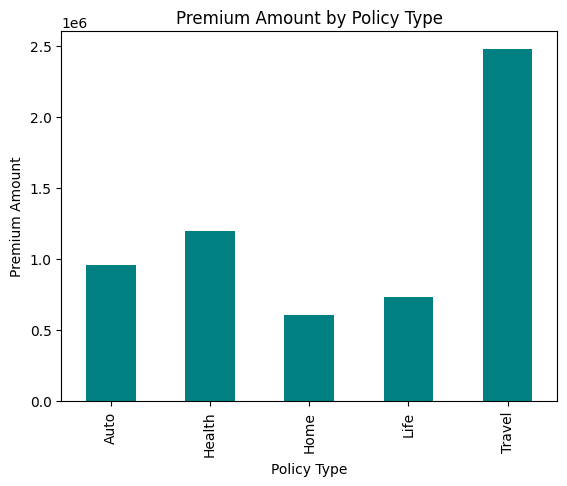

In [23]:
g2 = df.groupby('PolicyType')['PremiumAmount'].sum()

g2.plot(kind="bar", color="teal")
plt.xlabel("Policy Type")
plt.ylabel("Premium Amount")
plt.title('Premium Amount by Policy Type')
plt.show()

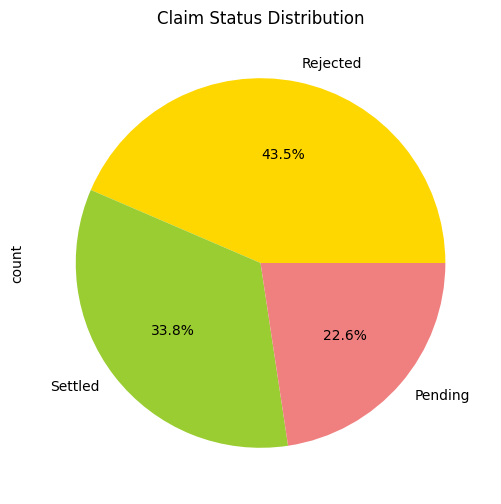

In [24]:
df['ClaimStatus'].value_counts().plot.pie(autopct = '%1.1f%%', figsize=(6,6), colors=['gold','yellowgreen','lightcoral','lightskyblue'])
plt.title('Claim Status Distribution')
plt.show()

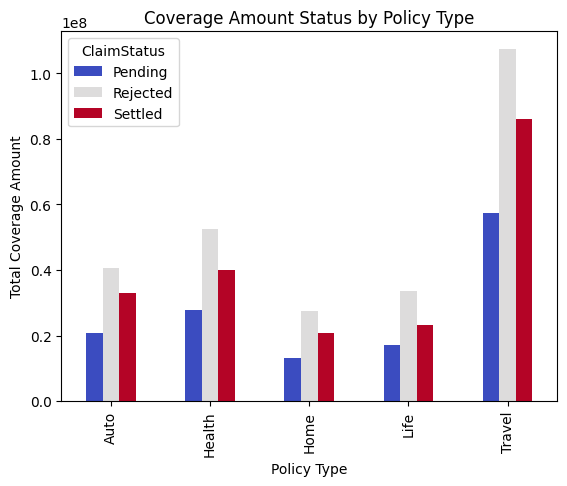

In [25]:
pivot_df = df.pivot_table(values='CoverageAmount', index='PolicyType', columns='ClaimStatus', aggfunc='sum')

pivot_df.plot(kind="bar", colormap='coolwarm')
plt.title('Coverage Amount Status by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Total Coverage Amount')
plt.show()

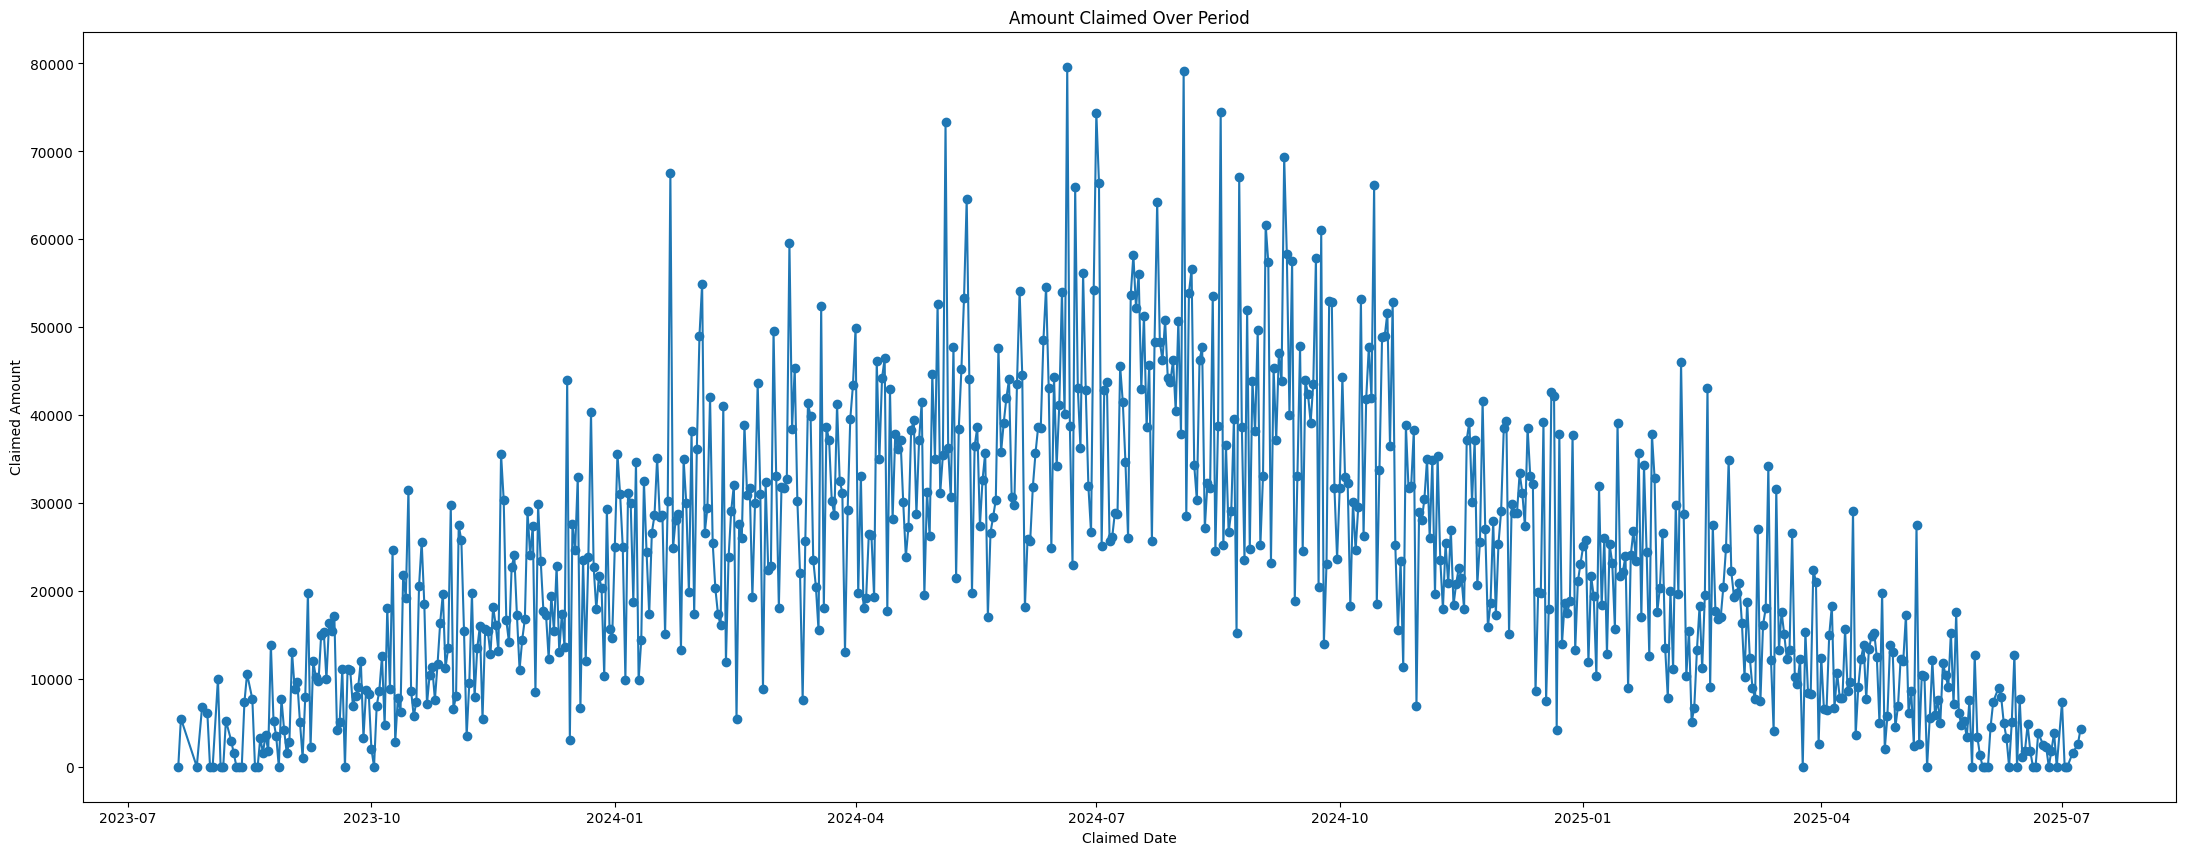

In [26]:
trend = df.groupby('ClaimDate')['ClaimAmount'].sum()

plt.figure(figsize=(27, 10)) 
plt.plot(trend, marker='o', linestyle='-')
plt.title('Amount Claimed Over Period')
plt.xlabel('Claimed Date')
plt.ylabel('Claimed Amount')
plt.show()

Text(0.5, 1.0, 'Violin PLot for Gender and Age')

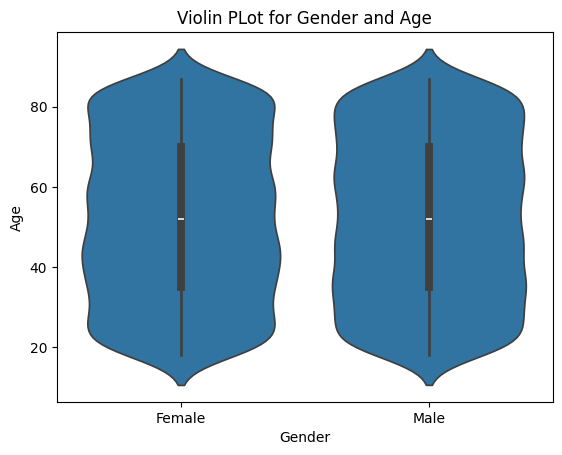

In [27]:
sns.violinplot(x='Gender', y='Age', data=df)
plt.title("Violin PLot for Gender and Age")

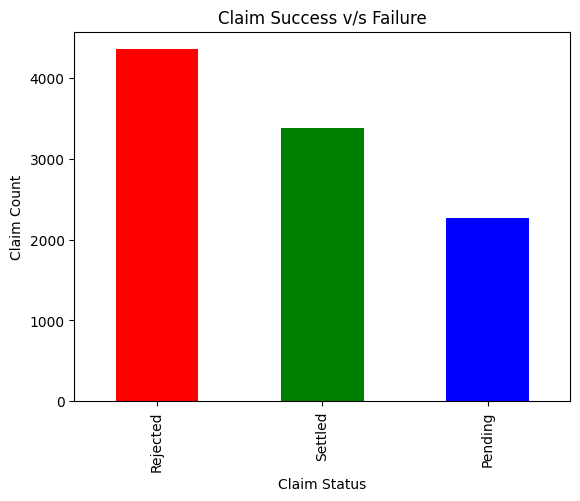

In [28]:
df['ClaimStatus'].value_counts().plot(kind="bar", color=["red","green", "blue"])
plt.title("Claim Success v/s Failure")
plt.xlabel('Claim Status')
plt.ylabel('Claim Count')
plt.show()

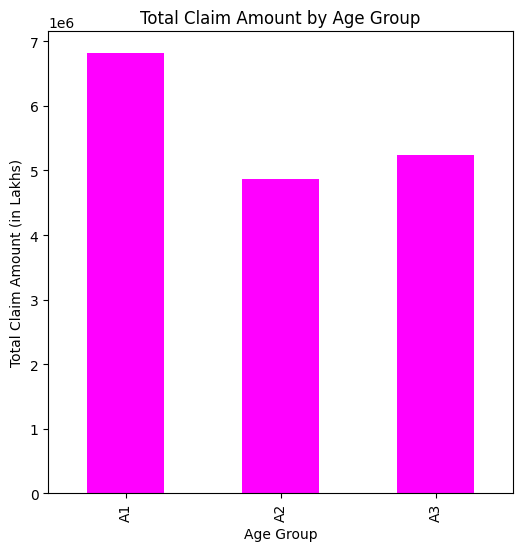

In [34]:
group = df.groupby('Age Group')['ClaimAmount'].sum()
plt.figure(figsize=(6,6))
group.plot(kind="bar", color="magenta")
plt.title('Total Claim Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Claim Amount (in Lakhs)')
plt.show()

Text(0.5, 1.0, 'Box PLot for Gender and Age')

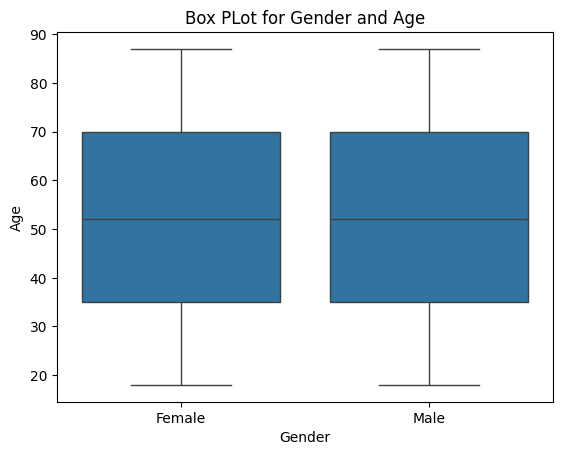

In [35]:
sns.boxplot(x='Gender', y='Age', data=df)
plt.title("Box PLot for Gender and Age")

<Axes: xlabel='Age', ylabel='CoverageAmount'>

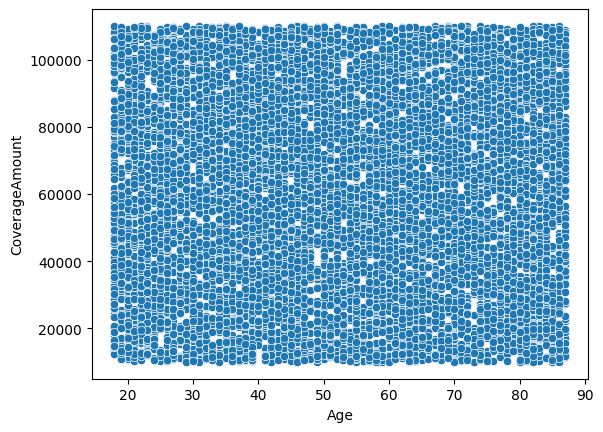

In [39]:
sns.scatterplot(x="Age", y="CoverageAmount", data=df)